## The objective of this analysis file is to group the buoys by Machine Learning methods

###  In our dataset, each observation (row) has been generated by one buoy. However, the dataset doesn't provide information that relates each observation with the buoy that has created it. The only hint provided is that all observations came from roughly 70 buoys. 

### Nevertheless, the information about the latitude and longitude of each observation give us the possibility to group the observations made by location, and then, extrapolate that each different location corresponds to a different buoy. 

### Import libraries

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

### Check the data

In [24]:
data = pd.read_csv('../Data/enso_data_cleaned.csv')
data['date'] = pd.to_datetime(data['date'])

In [25]:
data.head()

,obs,year,month,day,date,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1,1980,3,7,1980-03-07,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24
1,2,1980,3,8,1980-03-08,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97
2,3,1980,3,9,1980-03-09,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28
3,4,1980,3,10,1980-03-10,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31
4,5,1980,3,11,1980-03-11,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
obs          178080 non-null int64
year         178080 non-null int64
month        178080 non-null int64
day          178080 non-null int64
date         178080 non-null datetime64[ns]
latitude     178080 non-null float64
longitude    178080 non-null float64
zon.winds    152917 non-null float64
mer.winds    152918 non-null float64
humidity     112319 non-null float64
air temp.    159843 non-null float64
s.s.temp.    161073 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 16.3 MB


### We use DBSCAN method from sklearn to cluster our observations. 
### Each cluster will correspond to one different buoy.

#### We will cluster the observations in base of their location. Thus, we define X with the longitude and latitude.

In [29]:
X = data[['latitude', 'longitude' ]]

#### We set the most important parameters.

In [33]:
eps = 0.5
# The maximum distance between two samples for them to be considered as in the same neighborhood.

min_samples = 5
# The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

n_jobs = -1
# The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

#### We initialize and fit the model

In [34]:
dbs = DBSCAN(eps = eps, min_samples= min_samples, n_jobs= n_jobs)
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=-1, p=None)

#### We evaluate the model using the Silhouette score.

In [79]:
silhouette_score(X, dbs.labels_, sample_size= 50000)

0.9186374100807801

#### We add the labels from DBSCAN to a new column in the dataset.

In [38]:
data['buoy_label'] = dbs.labels_

#### We plot the coordinates together with the label.

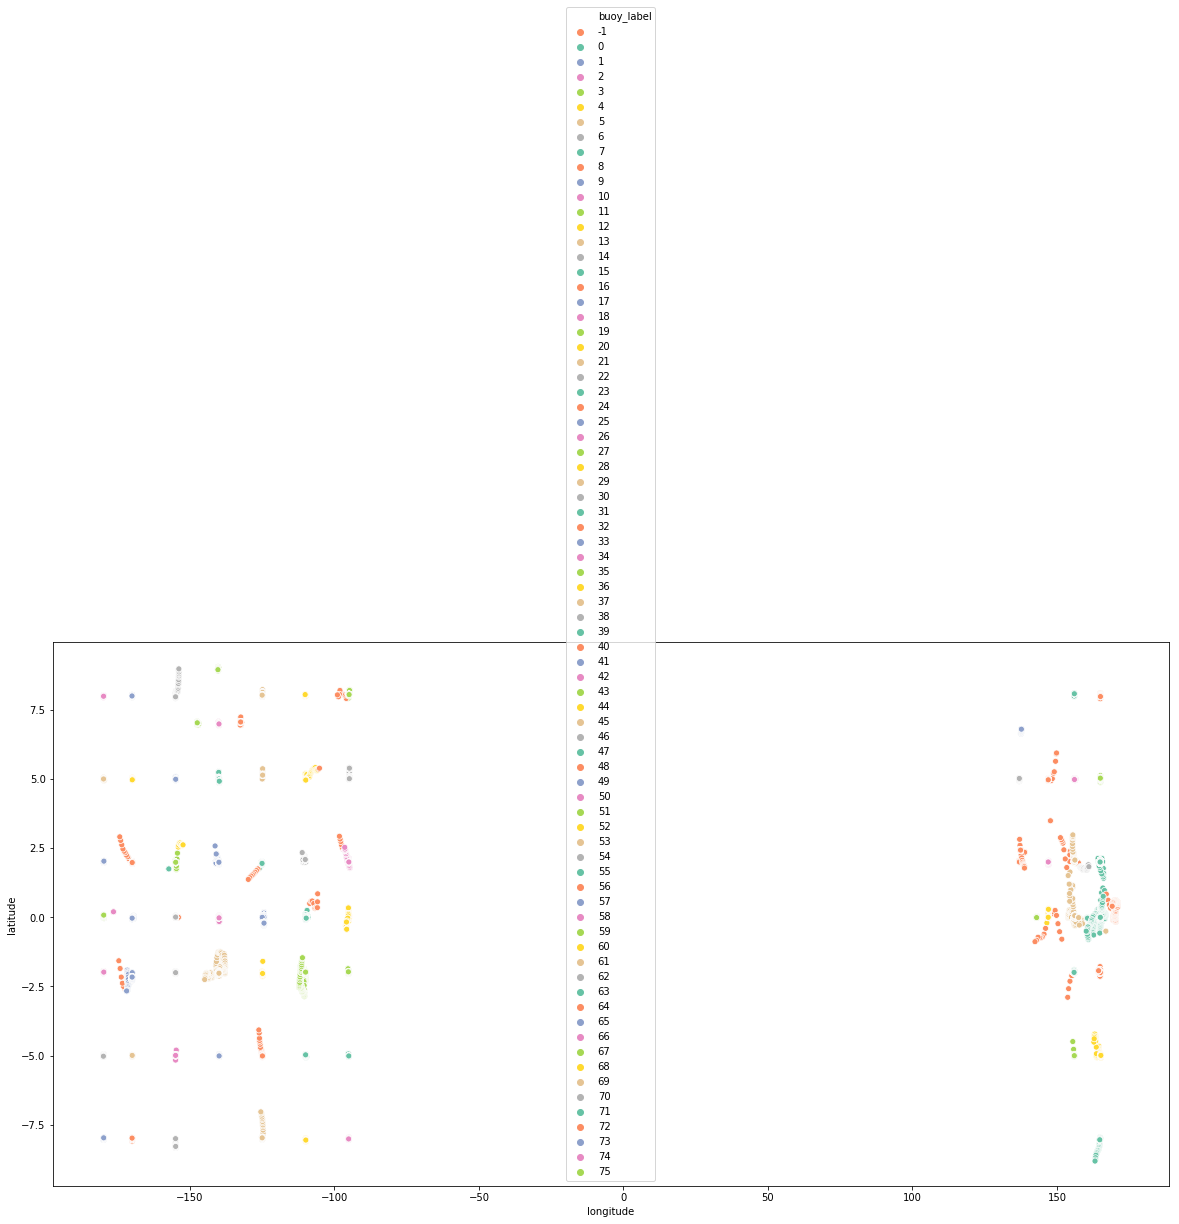

In [77]:
location = data[['latitude', 'longitude', 'buoy_label']]

#x = location[location['latitude']>6]['longitude']
#y = location[location['latitude']>6]['latitude']
#hue = location[location['latitude']>6]['buoy_label']

x = location['longitude']
y = location['latitude']
hue = location['buoy_label']


fig, ax = plt.subplots(figsize=(20, 10))


color_labels = hue.unique()

# List of RGB triplets
rgb_values = sns.color_palette("Set2", len(color_labels))

# Map label to RGB
color = dict(zip(color_labels, rgb_values))


sns.scatterplot(x, y,  hue = hue, palette = color, legend= 'full')